In [15]:
import pandas as pd
df = pd.read_excel("/kaggle/input/air-quality/AirQualityUCI _ Students.xlsx")

### Understanding Data

In [17]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8358 entries, 0 to 8357
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8358 non-null   datetime64[ns]
 1   Time           8358 non-null   object        
 2   CO(GT)         8358 non-null   float64       
 3   PT08.S1(CO)    8358 non-null   float64       
 4   NMHC(GT)       8358 non-null   int64         
 5   C6H6(GT)       8358 non-null   float64       
 6   PT08.S2(NMHC)  8358 non-null   float64       
 7   NOx(GT)        8358 non-null   float64       
 8   PT08.S3(NOx)   8358 non-null   float64       
 9   NO2(GT)        8358 non-null   float64       
 10  PT08.S4(NO2)   8358 non-null   float64       
 11  PT08.S5(O3)    8358 non-null   float64       
 12  T              8358 non-null   float64       
 13  RH             8358 non-null   float64       
 14  AH             8358 non-null   float64       
dtypes: datetime64[ns](1),

In [19]:
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].astype(np.float32)

#df['Year'] = df['Date'].dt.year
#df['Month'] = df['Date'].dt.month
#df['Day'] = df['Date'].dt.day

#df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

#df['Hour'] = df['Time'].apply(lambda x: x.hour)
#df['Minute'] = df['Time'].apply(lambda x: x.minute)
#df['Second'] = df['Time'].apply(lambda x: x.second)

for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype(np.int32)

In [21]:
df = df.drop(['Date','Time'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8358 entries, 0 to 8357
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         8358 non-null   float32
 1   PT08.S1(CO)    8358 non-null   float32
 2   NMHC(GT)       8358 non-null   int32  
 3   C6H6(GT)       8358 non-null   float32
 4   PT08.S2(NMHC)  8358 non-null   float32
 5   NOx(GT)        8358 non-null   float32
 6   PT08.S3(NOx)   8358 non-null   float32
 7   NO2(GT)        8358 non-null   float32
 8   PT08.S4(NO2)   8358 non-null   float32
 9   PT08.S5(O3)    8358 non-null   float32
 10  T              8358 non-null   float32
 11  RH             8358 non-null   float32
 12  AH             8358 non-null   float32
dtypes: float32(12), int32(1)
memory usage: 424.6 KB


In [22]:
df.isna().sum().sort_values()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [23]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000
mean,-36.187931,1038.533325,-158.119167,0.894268,889.323914,162.607941,790.043640,53.912224,1382.696777,968.419983,8.713361,38.201275,-7.780588
std,79.260155,338.349670,141.931963,43.609489,350.473602,260.322632,327.590973,130.150253,479.299713,464.837158,45.516937,53.678635,41.139233
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.500000,915.062500,-200.000000,3.968875,709.000000,45.000000,634.250000,49.000000,1177.500000,692.062500,10.450000,33.974998,0.675253
50%,1.500000,1048.500000,-200.000000,7.826424,892.000000,136.000000,793.000000,95.000000,1442.500000,940.125000,17.225000,48.137499,0.971383
75%,2.600000,1215.687500,-200.000000,13.636091,1104.750000,282.000000,958.687500,132.000000,1658.187500,1251.750000,24.075001,61.593749,1.307486
max,11.900000,2007.750000,1189.000000,63.741478,2214.000000,1479.000000,2682.750000,339.700012,2775.000000,2522.750000,44.600002,87.175003,2.231036


In [8]:
df = df.drop(['Minute','Second'], axis=1)

In [24]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875000,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700001,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975002,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [25]:
df.eq(-200).sum()

CO(GT)           1585
PT08.S1(CO)       366
NMHC(GT)         7525
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1573
PT08.S3(NOx)      366
NO2(GT)          1576
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [26]:
import numpy as np
df.replace(-200, np.nan, inplace=True)
df.isna().sum().sort_values()

PT08.S1(CO)       366
C6H6(GT)          366
PT08.S3(NOx)      366
PT08.S2(NMHC)     366
RH                366
T                 366
PT08.S5(O3)       366
PT08.S4(NO2)      366
AH                366
NOx(GT)          1573
NO2(GT)          1576
CO(GT)           1585
NMHC(GT)         7525
dtype: int64

In [27]:
df = df.dropna(subset=['CO(GT)'])

In [28]:
df.isna().sum().sort_values()

CO(GT)              0
PT08.S1(CO)       330
C6H6(GT)          330
PT08.S2(NMHC)     330
PT08.S3(NOx)      330
T                 330
PT08.S5(O3)       330
PT08.S4(NO2)      330
AH                330
RH                330
NOx(GT)           384
NO2(GT)           387
NMHC(GT)         5960
dtype: int64

In [29]:
threshold = df['CO(GT)'].mean()
threshold

2.1469512

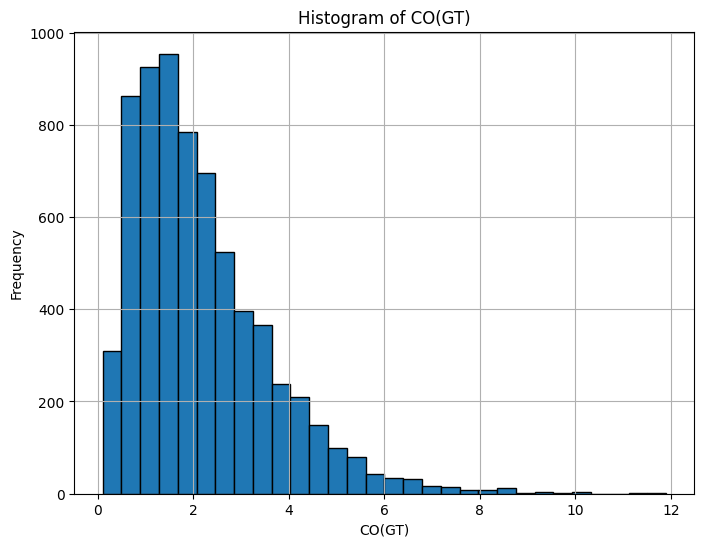

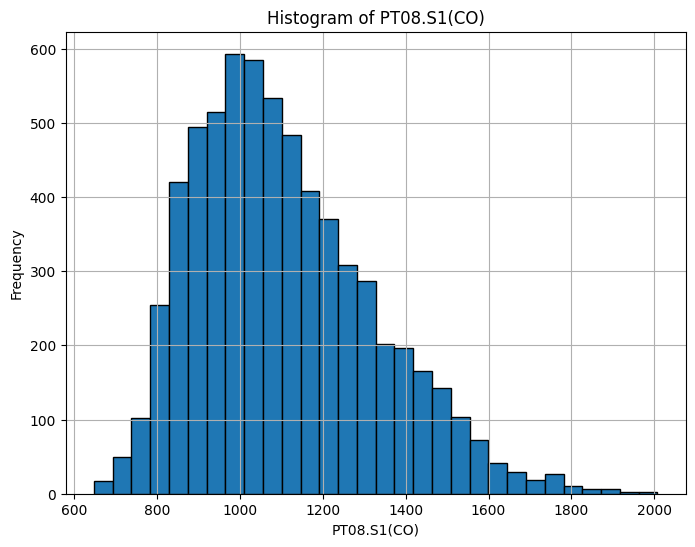

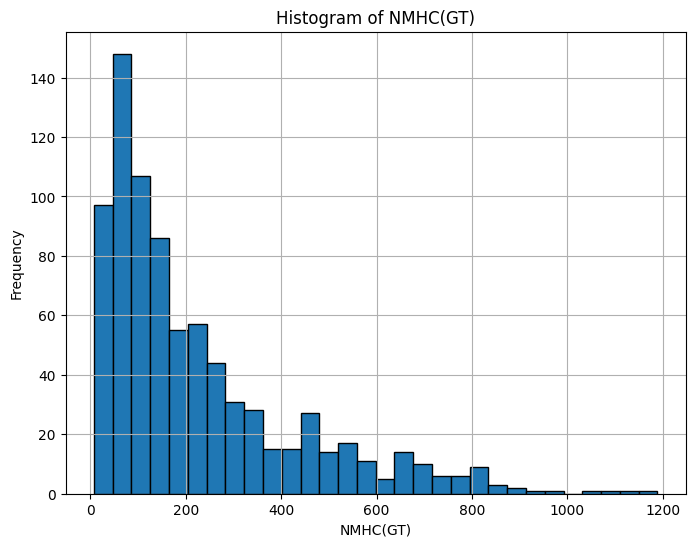

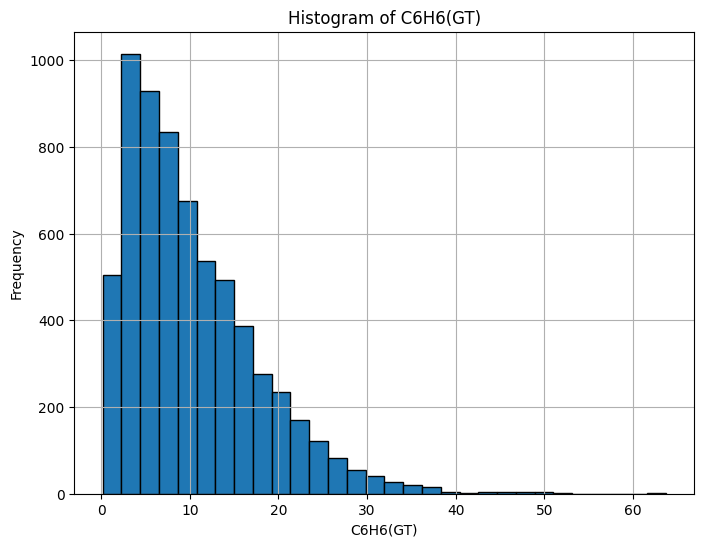

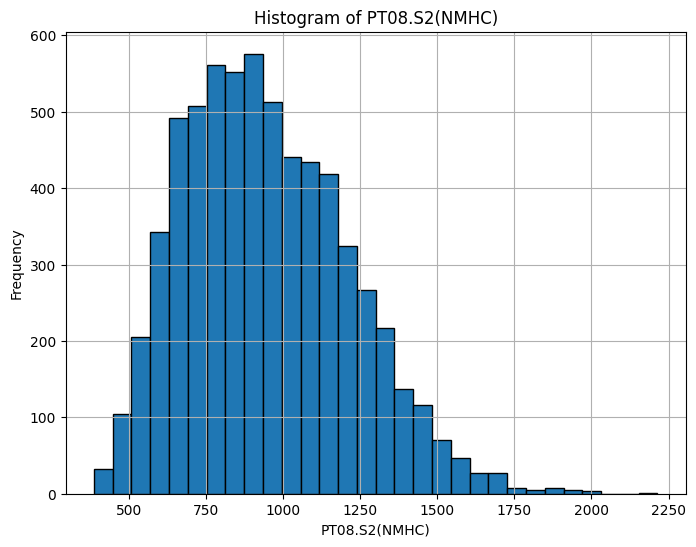

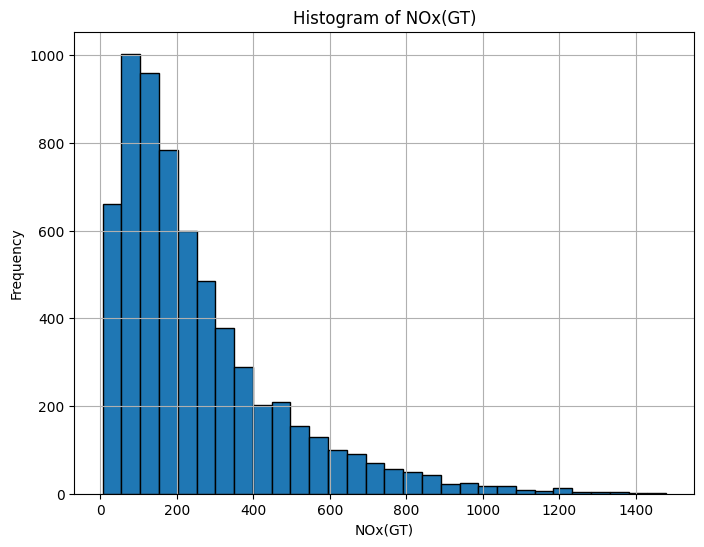

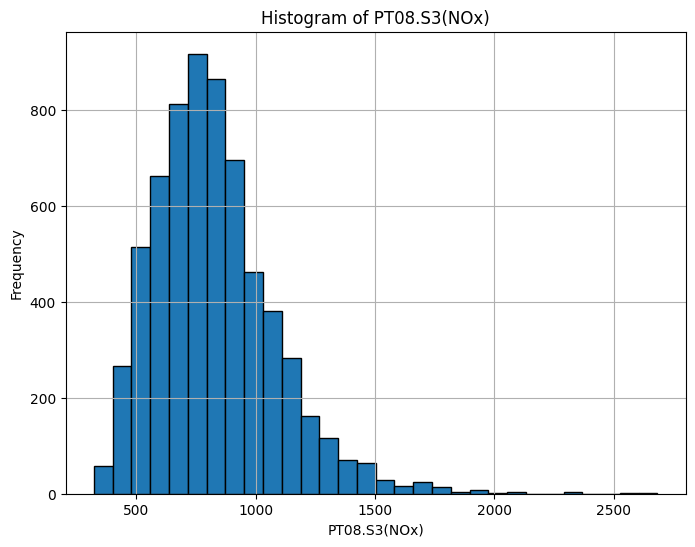

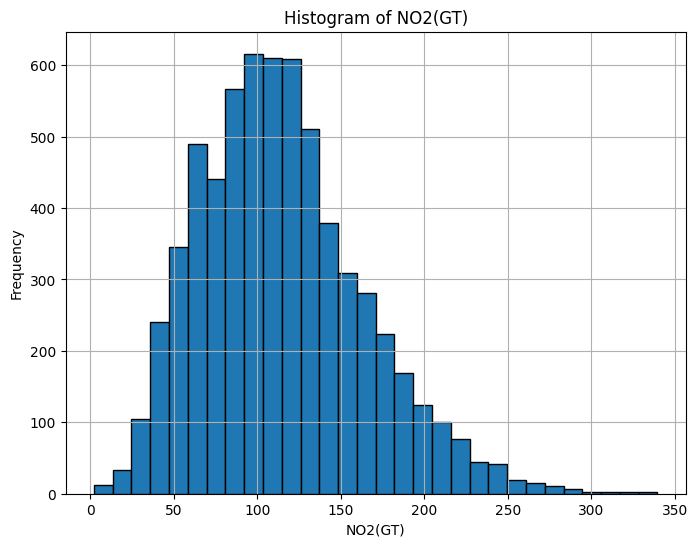

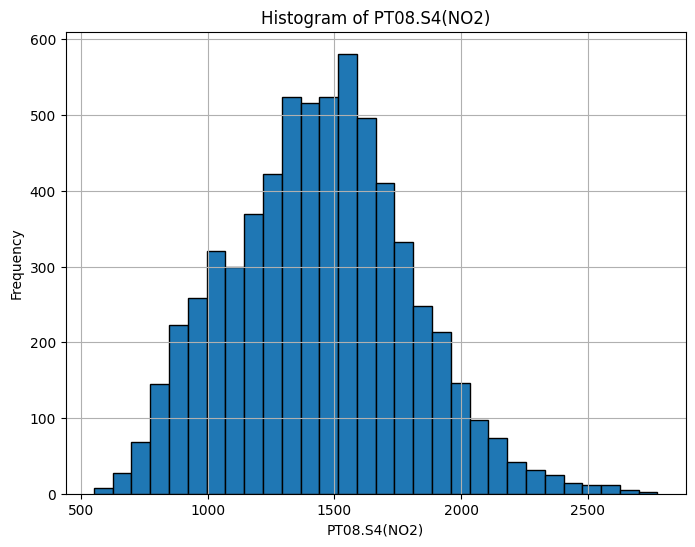

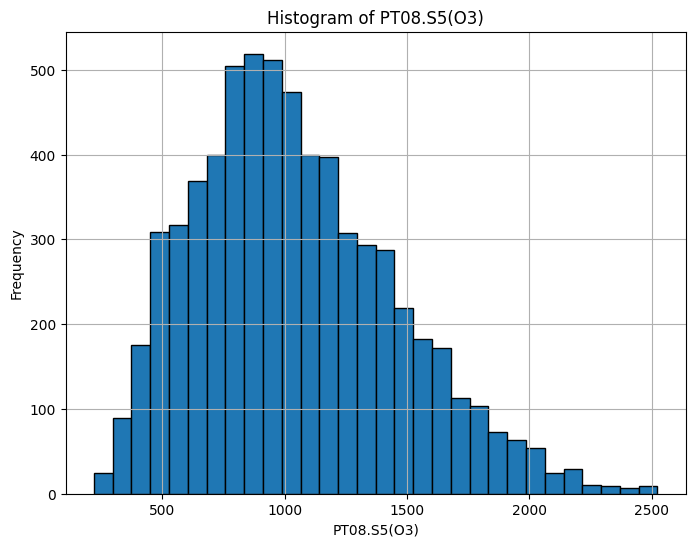

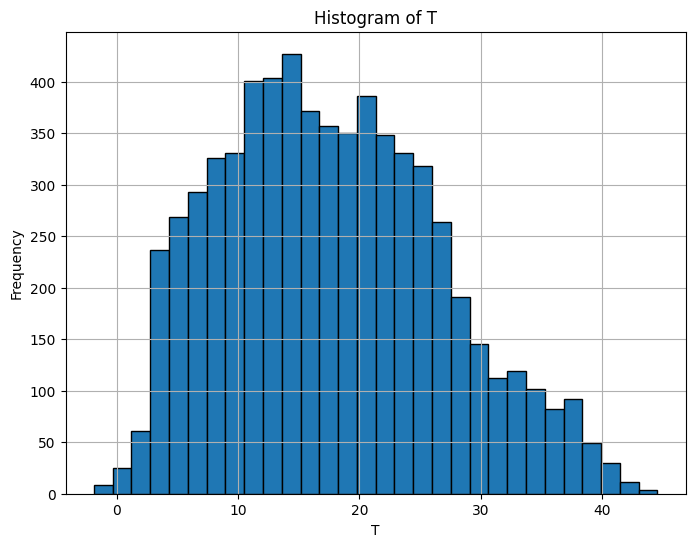

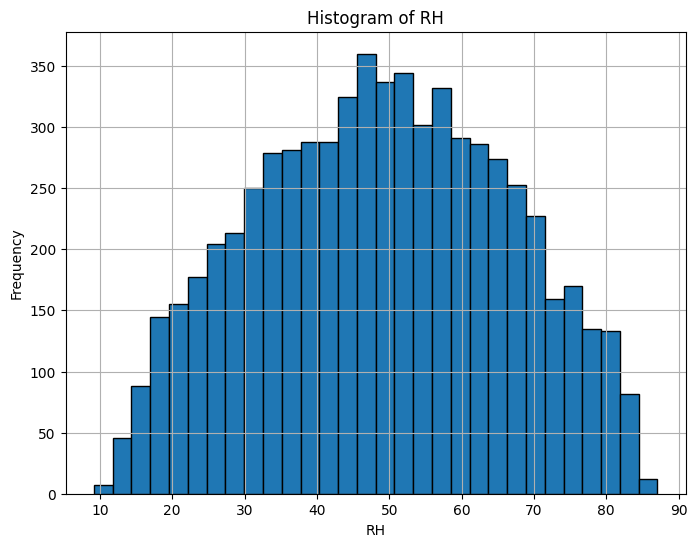

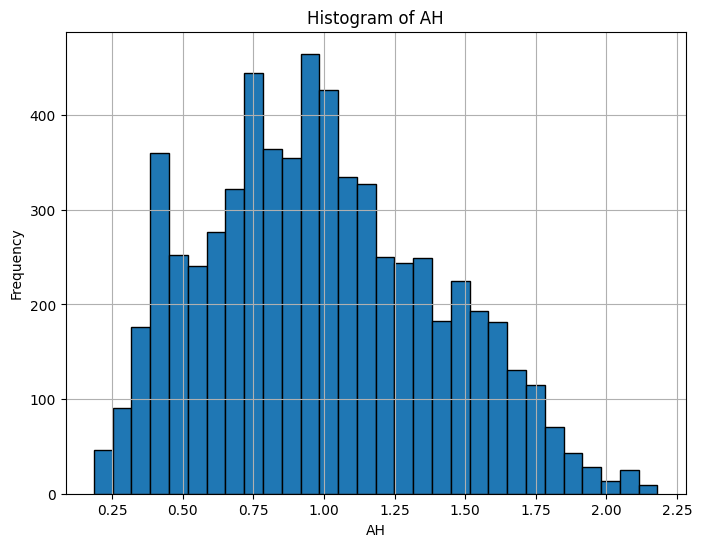

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int', 'float']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


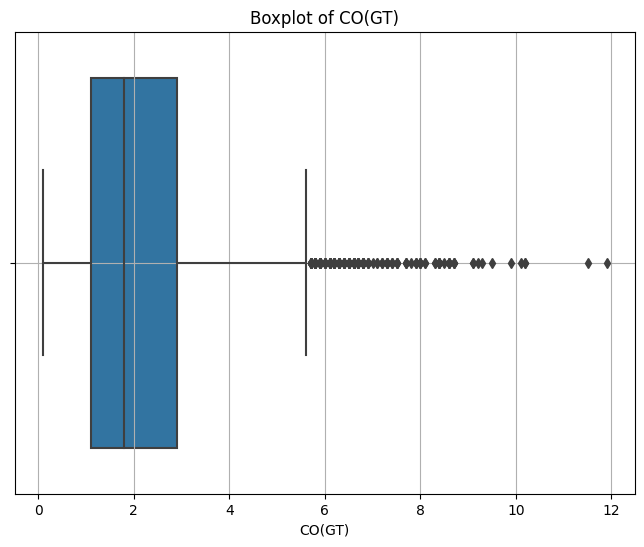

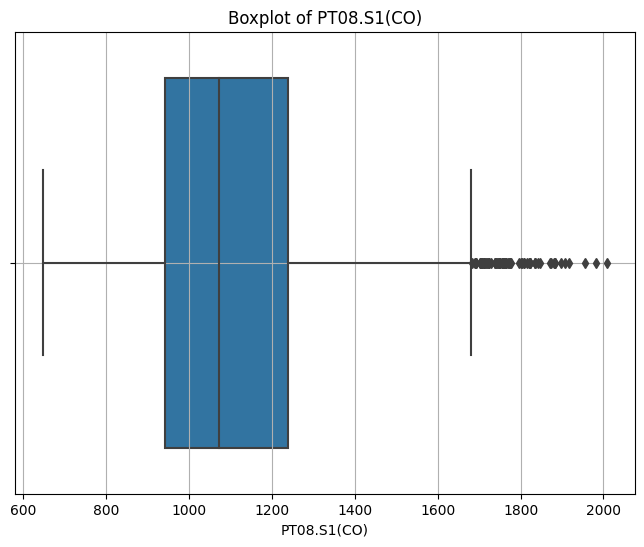

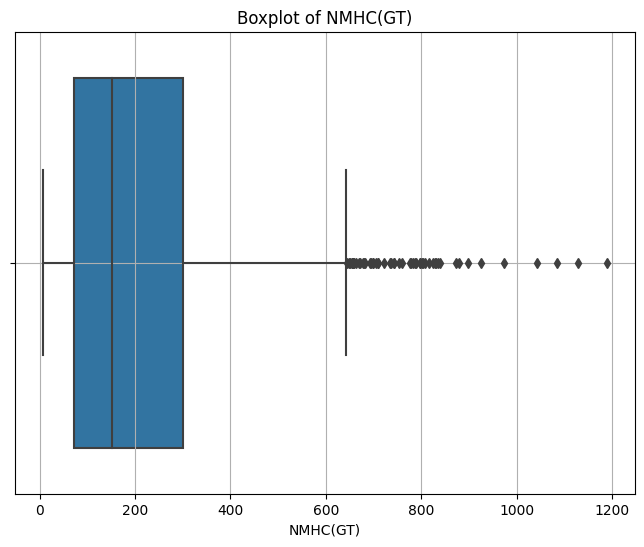

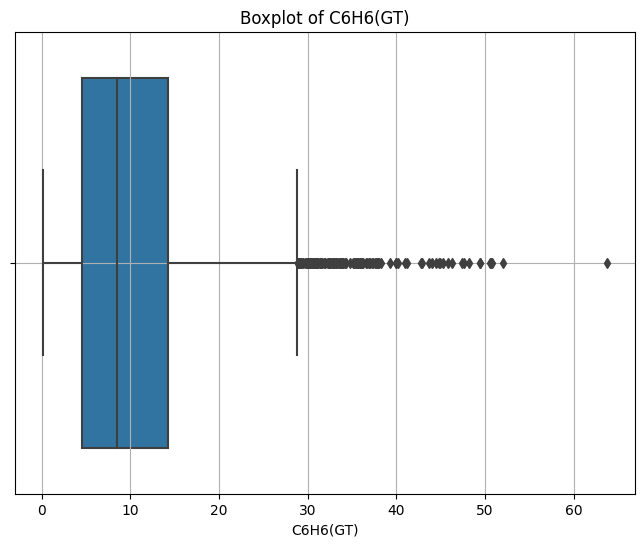

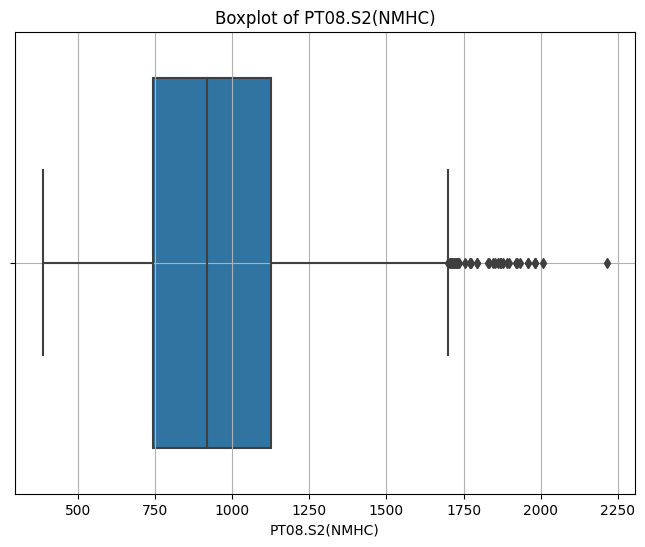

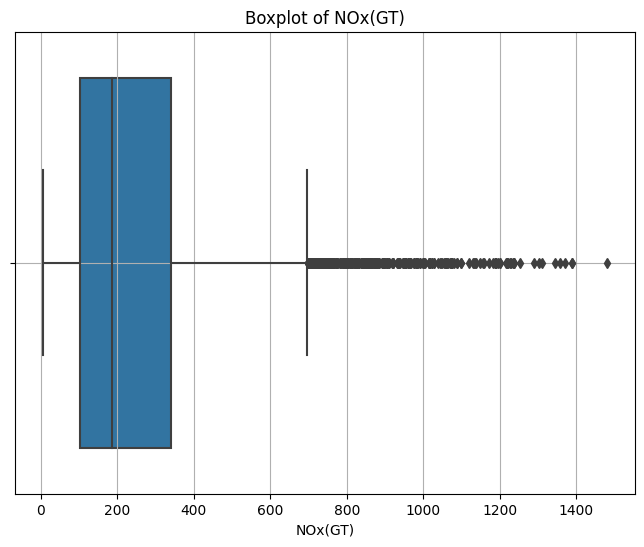

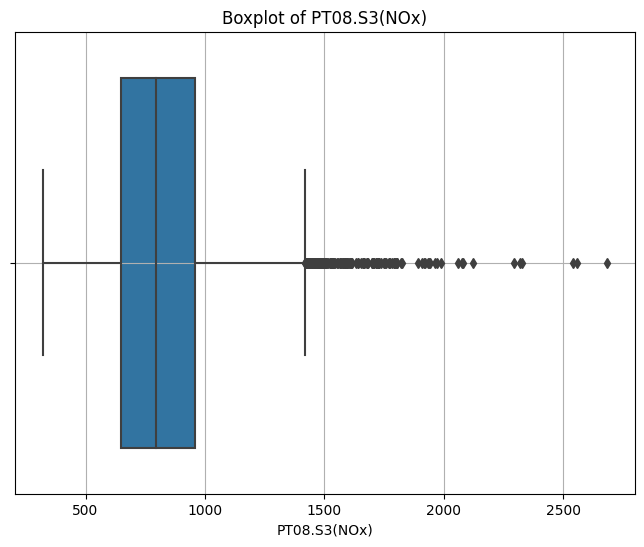

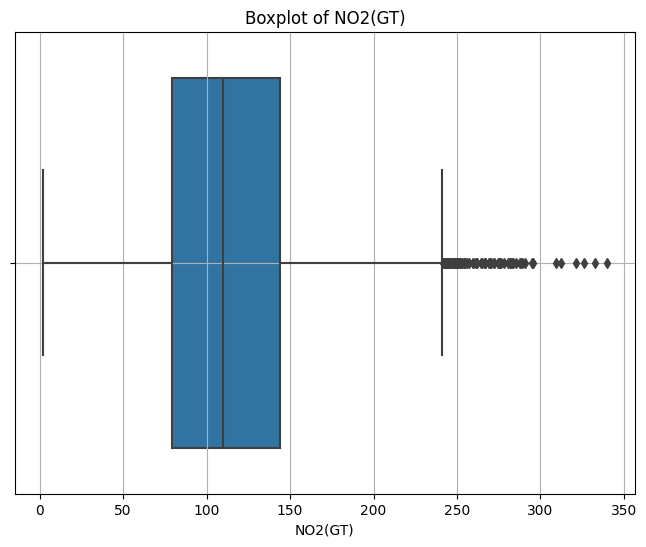

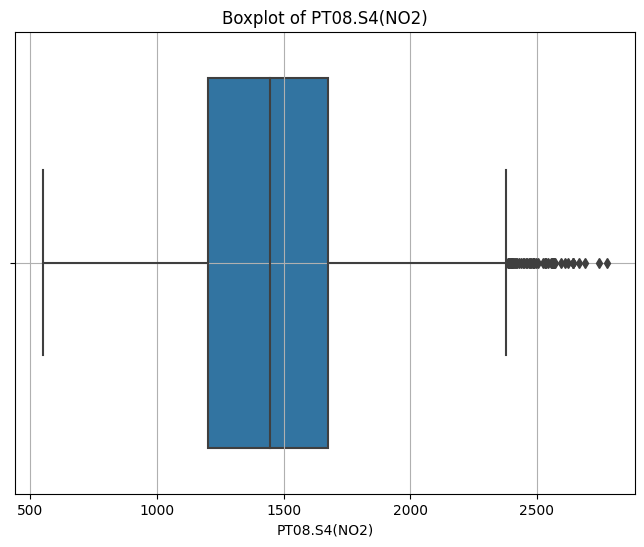

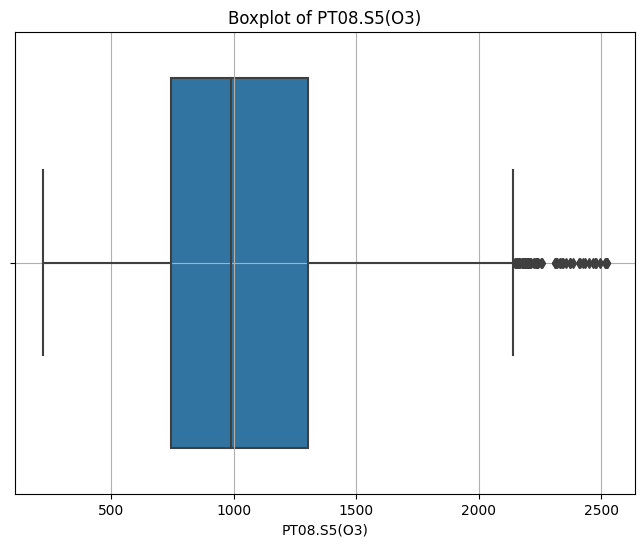

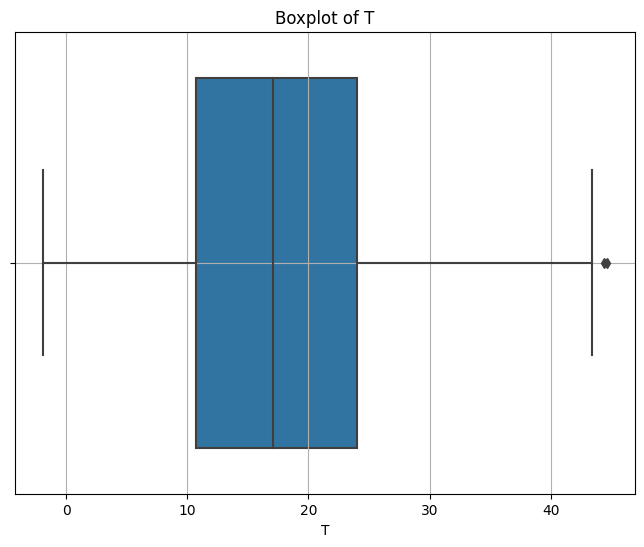

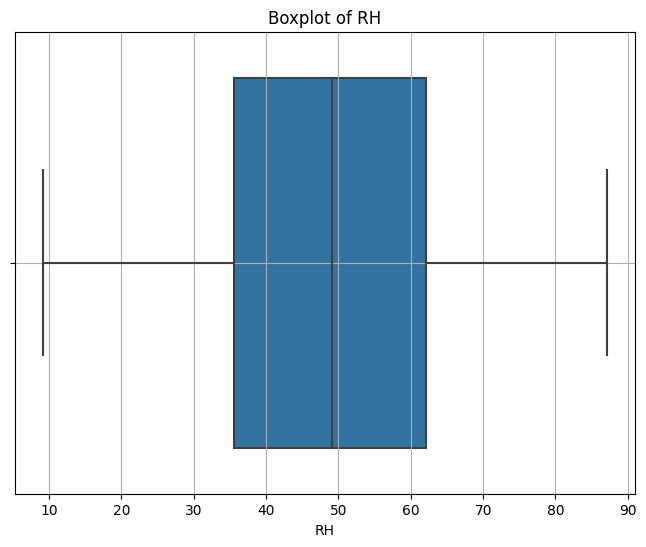

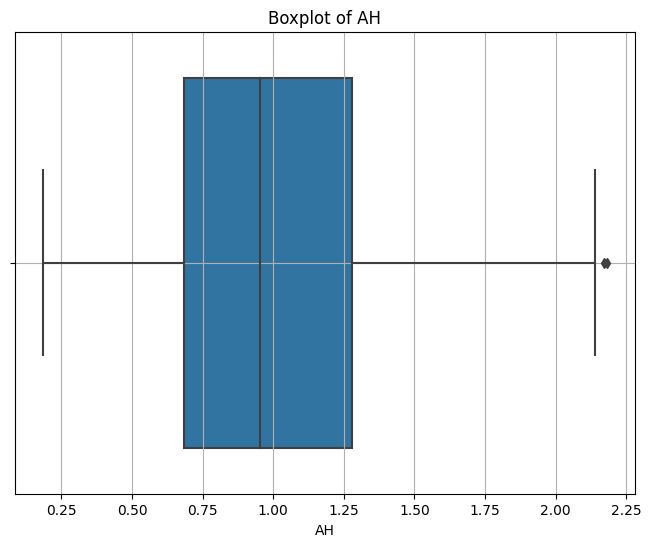

In [31]:

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


### Pre-processing 

In [32]:
X = df.drop('CO(GT)', axis=1).values
y = (df['CO(GT)'] > threshold).astype(int).values
print(X.shape,y.shape)

(6773, 12) (6773,)


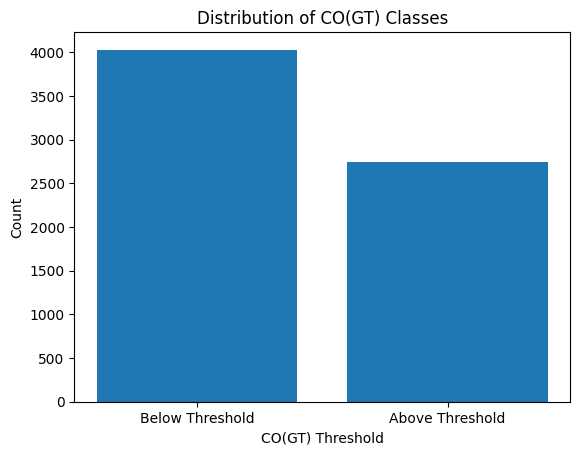

In [33]:
import matplotlib.pyplot as plt
import numpy as np

unique, counts = np.unique(y, return_counts=True)

plt.bar(unique, counts, tick_label=['Below Threshold', 'Above Threshold'])
plt.xlabel('CO(GT) Threshold')
plt.ylabel('Count')
plt.title('Distribution of CO(GT) Classes')
plt.show()

In [34]:
counts

array([4029, 2744])

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=116)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=116)

In [36]:
numeric_features = np.arange(0, X_train.shape[1])

numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=7, weights='uniform')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

processed_columns = df.drop('CO(GT)', axis=1).columns.tolist()

X_train_processed_df = pd.DataFrame(X_train_processed, columns=processed_columns)
X_val_processed_df = pd.DataFrame(X_val_processed, columns=processed_columns)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=processed_columns)

print(f"Training set after preprocessing: {X_train_processed_df.shape}, {y_train.shape}")
print(f"Validation set after preprocessing: {X_val_processed_df.shape}, {y_val.shape}")
print(f"Test set after preprocessing: {X_test_processed_df.shape}, {y_test.shape}")

Training set after preprocessing: (4334, 12), (4334,)
Validation set after preprocessing: (1084, 12), (1084,)
Test set after preprocessing: (1355, 12), (1355,)


In [52]:
#Merging the dataframe is just for plotting histograms and boxplots after processing, and we can also inspect the data how the NA's are filled

In [53]:
for col in processed_columns:
    X_train_processed_df[col] = pd.to_numeric(X_train_processed_df[col])
    X_val_processed_df[col] = pd.to_numeric(X_val_processed_df[col])
    X_test_processed_df[col] = pd.to_numeric(X_test_processed_df[col])
merged_df = pd.concat([X_train_processed_df, X_val_processed_df, X_test_processed_df], ignore_index=True)

In [54]:
merged_df.head()

,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Hour
0,2.260863,3.234719,2.164914,1.951598,2.313112,-1.814696,1.559235,1.047855,2.339682,-0.511760,0.118192,-0.552906,1.632044,-0.886920,0.093864,-0.394390
1,-0.775263,-0.958793,-0.856627,-0.910552,-0.838185,1.037136,-0.841714,-0.224789,-0.295643,-0.769535,0.907850,-0.381188,-0.612729,-0.602059,-0.251083,-1.544168
2,0.298932,0.008079,-0.487495,-0.397858,-0.149572,-0.706711,0.549721,-0.653303,-0.422707,0.186727,-0.510045,-0.228434,1.632044,-0.886920,0.323830,0.324221
3,0.939227,0.724317,0.281860,0.436342,-0.425393,-0.165274,-0.139803,0.814967,0.647991,0.671787,-0.888150,-0.023101,-0.612729,-0.602059,0.898743,-0.250668
4,-1.509375,-0.438170,-1.248844,-1.690534,-0.554390,2.142108,-0.608432,-2.266322,-1.804213,-2.036235,-0.441695,-1.850326,1.632044,-0.886920,-1.745857,-0.681835


In [55]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6773 entries, 0 to 6772
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PT08.S1(CO)    6773 non-null   float64
 1   NMHC(GT)       6773 non-null   float64
 2   C6H6(GT)       6773 non-null   float64
 3   PT08.S2(NMHC)  6773 non-null   float64
 4   NOx(GT)        6773 non-null   float64
 5   PT08.S3(NOx)   6773 non-null   float64
 6   NO2(GT)        6773 non-null   float64
 7   PT08.S4(NO2)   6773 non-null   float64
 8   PT08.S5(O3)    6773 non-null   float64
 9   T              6773 non-null   float64
 10  RH             6773 non-null   float64
 11  AH             6773 non-null   float64
 12  Year           6773 non-null   float64
 13  Month          6773 non-null   float64
 14  Day            6773 non-null   float64
 15  Hour           6773 non-null   float64
dtypes: float64(16)
memory usage: 846.8 KB


In [56]:
merged_df.isna().sum().sort_values()

PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Year             0
Month            0
Day              0
Hour             0
dtype: int64

array([[<Axes: title={'center': 'PT08.S1(CO)'}>,
        <Axes: title={'center': 'NMHC(GT)'}>,
        <Axes: title={'center': 'C6H6(GT)'}>,
        <Axes: title={'center': 'PT08.S2(NMHC)'}>],
       [<Axes: title={'center': 'NOx(GT)'}>,
        <Axes: title={'center': 'PT08.S3(NOx)'}>,
        <Axes: title={'center': 'NO2(GT)'}>,
        <Axes: title={'center': 'PT08.S4(NO2)'}>],
       [<Axes: title={'center': 'PT08.S5(O3)'}>,
        <Axes: title={'center': 'T'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'AH'}>],
       [<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Hour'}>]], dtype=object)

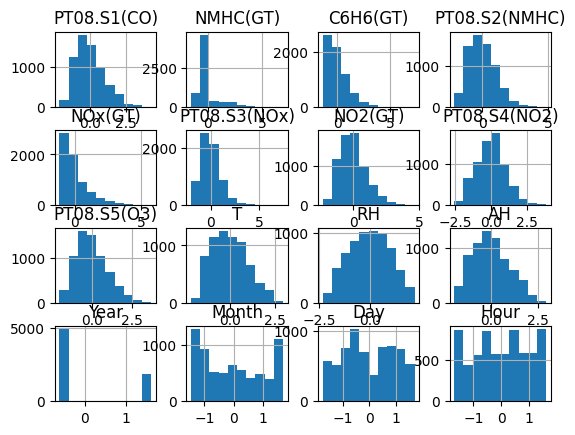

In [57]:
merged_df.hist()

<Axes: >

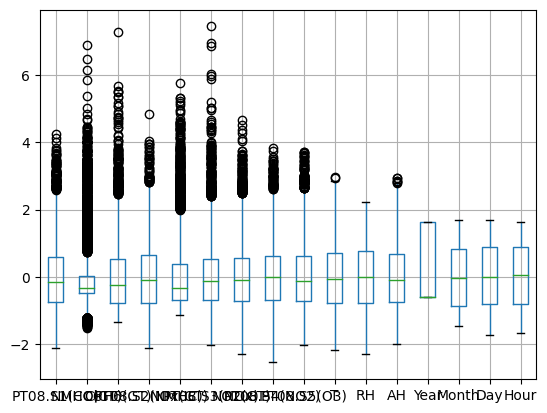

In [58]:
merged_df.boxplot()

### Model Development

### Classification1

In [37]:
tf.random.set_seed(116)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

def create_classification_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_shape=(input_shape,), activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    #model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    print(model.summary())
    return model

classification_model = create_classification_model(X_train_processed.shape[1])
classification_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = classification_model.fit(X_train_processed, y_train, epochs=128,
                                   batch_size=32, validation_data=(X_val_processed, y_val),
                                   callbacks=[early_stopping], class_weight=class_weights_dict)

y_train_pred = (classification_model.predict(X_train_processed) > 0.5).astype(int)
y_val_pred = (classification_model.predict(X_val_processed) > 0.5).astype(int)
y_test_pred = (classification_model.predict(X_test_processed) > 0.5).astype(int)

print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")

print(f"Precision: {precision_score(y_test, y_test_pred)}")
print(f"Recall: {recall_score(y_test, y_test_pred)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred)}")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5790 - loss: 0.6296 - val_accuracy: 0.8450 - val_loss: 0.4983
Epoch 2/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8701 - loss: 0.4431 - val_accuracy: 0.8939 - val_loss: 0.3517
Epoch 3/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9007 - loss: 0.3238 - val_accuracy: 0.9068 - val_loss: 0.2695
Epoch 4/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9075 - loss: 0.2625 - val_accuracy: 0.9105 - val_loss: 0.2298
Epoch 5/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9138 - loss: 0.2345 - val_accuracy: 0.9170 - val_loss: 0.2098
Epoch 6/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9164 - loss: 0.2207 - val_accuracy: 0.9234 - val_loss: 0.1985
Epoch 7/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9199 - loss: 0.2128 - val_accuracy: 0.9280 - val_loss: 0.1911
Epoch 8/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9230 - loss: 0.2075 - val

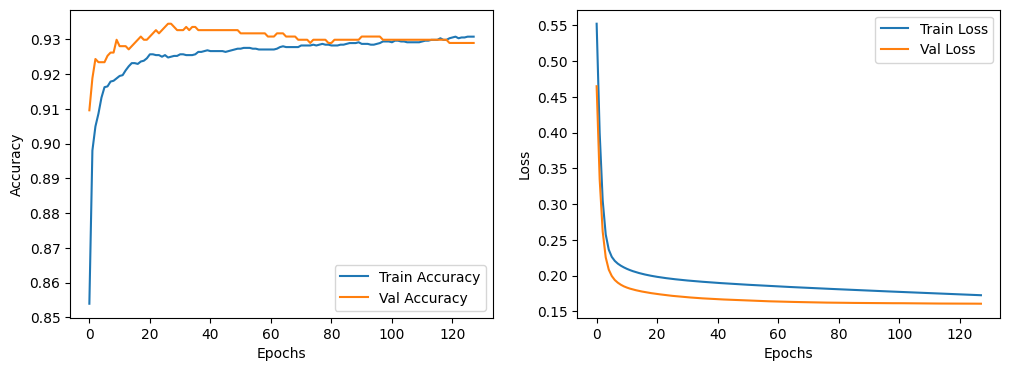

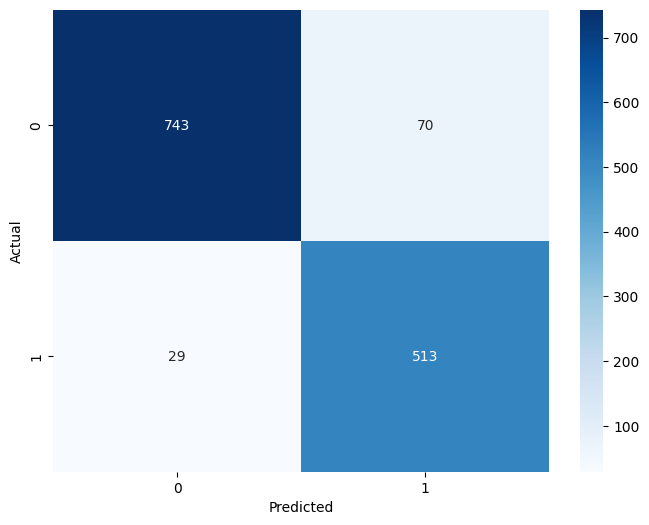

In [46]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Regression

In [66]:
import pandas as pd
df = pd.read_excel("/kaggle/input/air-quality/AirQualityUCI _ Students.xlsx")

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8358 entries, 0 to 8357
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8358 non-null   datetime64[ns]
 1   Time           8358 non-null   object        
 2   CO(GT)         8358 non-null   float64       
 3   PT08.S1(CO)    8358 non-null   float64       
 4   NMHC(GT)       8358 non-null   int64         
 5   C6H6(GT)       8358 non-null   float64       
 6   PT08.S2(NMHC)  8358 non-null   float64       
 7   NOx(GT)        8358 non-null   float64       
 8   PT08.S3(NOx)   8358 non-null   float64       
 9   NO2(GT)        8358 non-null   float64       
 10  PT08.S4(NO2)   8358 non-null   float64       
 11  PT08.S5(O3)    8358 non-null   float64       
 12  T              8358 non-null   float64       
 13  RH             8358 non-null   float64       
 14  AH             8358 non-null   float64       
dtypes: datetime64[ns](1),

In [68]:
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].astype(np.float32)

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

df['Hour'] = df['Time'].apply(lambda x: x.hour)
df['Minute'] = df['Time'].apply(lambda x: x.minute)
df['Second'] = df['Time'].apply(lambda x: x.second)

for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype(np.int32)

In [69]:
df = df.drop(['Date','Time','Minute','Second'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8358 entries, 0 to 8357
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         8358 non-null   float32
 1   PT08.S1(CO)    8358 non-null   float32
 2   NMHC(GT)       8358 non-null   int32  
 3   C6H6(GT)       8358 non-null   float32
 4   PT08.S2(NMHC)  8358 non-null   float32
 5   NOx(GT)        8358 non-null   float32
 6   PT08.S3(NOx)   8358 non-null   float32
 7   NO2(GT)        8358 non-null   float32
 8   PT08.S4(NO2)   8358 non-null   float32
 9   PT08.S5(O3)    8358 non-null   float32
 10  T              8358 non-null   float32
 11  RH             8358 non-null   float32
 12  AH             8358 non-null   float32
 13  Year           8358 non-null   int32  
 14  Month          8358 non-null   int32  
 15  Day            8358 non-null   int32  
 16  Hour           8358 non-null   int32  
dtypes: float32(12), int32(5)
memory usage: 555.1 KB


In [70]:
df.eq(-200).sum().sort_values()

Day                 0
Year                0
Month               0
Hour                0
PT08.S4(NO2)      366
C6H6(GT)          366
PT08.S3(NOx)      366
PT08.S1(CO)       366
RH                366
T                 366
PT08.S5(O3)       366
AH                366
PT08.S2(NMHC)     366
NOx(GT)          1573
NO2(GT)          1576
CO(GT)           1585
NMHC(GT)         7525
dtype: int64

In [71]:
import numpy as np
df.replace(-200, np.nan, inplace=True)
df.isna().sum().sort_values()

Day                 0
Year                0
Month               0
Hour                0
PT08.S4(NO2)      366
C6H6(GT)          366
PT08.S3(NOx)      366
PT08.S1(CO)       366
RH                366
T                 366
PT08.S5(O3)       366
AH                366
PT08.S2(NMHC)     366
NOx(GT)          1573
NO2(GT)          1576
CO(GT)           1585
NMHC(GT)         7525
dtype: int64

In [72]:
df = df.dropna(subset=['NOx(GT)'])
df.isna().sum().sort_values()

NOx(GT)             0
Year                0
Day                 0
Month               0
Hour                0
NO2(GT)             3
PT08.S1(CO)       322
PT08.S2(NMHC)     322
RH                322
T                 322
PT08.S3(NOx)      322
PT08.S4(NO2)      322
PT08.S5(O3)       322
AH                322
C6H6(GT)          322
CO(GT)            396
NMHC(GT)         5985
dtype: int64

In [73]:
X = df.drop('NOx(GT)', axis=1).values
y = df['NOx(GT)'].values
print(X.shape,y.shape)

(6785, 16) (6785,)


In [74]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=116)
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_train_reg, y_train_reg, test_size=0.2, random_state=116)

### Imputation with KNNImputer

In [75]:
numeric_features = np.arange(0, X_train_reg.shape[1])

numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=7, weights='uniform')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

X_train_reg_processed = preprocessor.fit_transform(X_train_reg)
X_val_reg_processed = preprocessor.transform(X_val_reg)
X_test_reg_processed = preprocessor.transform(X_test_reg)

processed_columns = df.drop('NOx(GT)', axis=1).columns.tolist()

X_train_processed_df = pd.DataFrame(X_train_reg_processed, columns=processed_columns)
X_val_processed_df = pd.DataFrame(X_val_reg_processed, columns=processed_columns)
X_test_processed_df = pd.DataFrame(X_test_reg_processed, columns=processed_columns)

print(f"Training set after preprocessing: {X_train_processed_df.shape}, {y_train.shape}")
print(f"Validation set after preprocessing: {X_val_processed_df.shape}, {y_val.shape}")
print(f"Test set after preprocessing: {X_test_processed_df.shape}, {y_test.shape}")

Training set after preprocessing: (4342, 16), (4334,)
Validation set after preprocessing: (1086, 16), (1084,)
Test set after preprocessing: (1357, 16), (1355,)


In [76]:
for col in processed_columns:
    X_train_processed_df[col] = pd.to_numeric(X_train_processed_df[col])
    X_val_processed_df[col] = pd.to_numeric(X_val_processed_df[col])
    X_test_processed_df[col] = pd.to_numeric(X_test_processed_df[col])
merged_df = pd.concat([X_train_processed_df, X_val_processed_df, X_test_processed_df], ignore_index=True)

In [77]:
merged_df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Hour
0,-0.681924,-0.568832,-0.594467,-0.854290,-0.900314,0.262367,-0.252425,-0.866294,-0.625533,-0.741824,1.168500,-0.208399,-0.626189,1.723250,1.315232,-1.746560
1,-0.129984,-0.280490,0.320774,-0.278396,-0.208513,-0.114476,-0.047581,-0.418180,0.098779,-0.599657,0.583214,-0.312692,-0.626189,1.723250,0.050726,-0.867544
2,0.421957,0.548472,0.688107,0.695078,0.811509,-0.672952,0.915187,1.447067,0.635573,1.739244,-1.169509,1.217292,-0.626189,0.288805,-1.673599,-0.281533
3,0.678215,-0.491696,0.648529,0.189337,0.344820,-0.148773,0.300654,0.442317,-0.458694,1.500733,-1.521892,0.109504,-0.626189,0.288805,1.200277,0.890488
4,0.076994,0.119549,0.688107,0.297782,0.449683,-0.286820,1.120031,0.910293,-0.071653,2.408173,-1.653487,1.192473,-0.626189,0.001916,1.545142,0.597482


In [78]:
merged_df.isna().sum().sort_values()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Year             0
Month            0
Day              0
Hour             0
dtype: int64

array([[<Axes: title={'center': 'CO(GT)'}>,
        <Axes: title={'center': 'PT08.S1(CO)'}>,
        <Axes: title={'center': 'NMHC(GT)'}>,
        <Axes: title={'center': 'C6H6(GT)'}>],
       [<Axes: title={'center': 'PT08.S2(NMHC)'}>,
        <Axes: title={'center': 'PT08.S3(NOx)'}>,
        <Axes: title={'center': 'NO2(GT)'}>,
        <Axes: title={'center': 'PT08.S4(NO2)'}>],
       [<Axes: title={'center': 'PT08.S5(O3)'}>,
        <Axes: title={'center': 'T'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'AH'}>],
       [<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Hour'}>]], dtype=object)

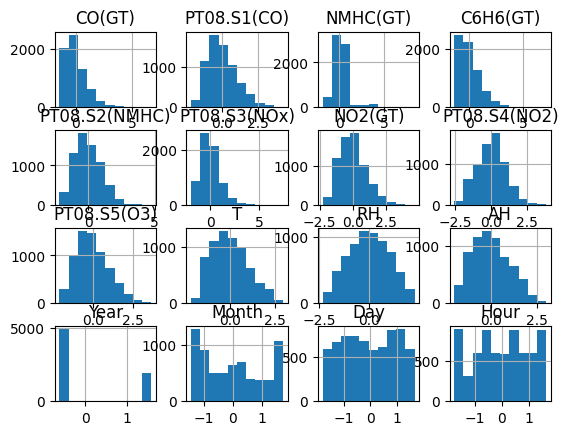

In [79]:
merged_df.hist()

In [82]:
tf.random.set_seed(172)

In [85]:
def create_regression_model(input_shape):
    model = Sequential()
    model.add(Dense(128, input_shape=(input_shape,), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    return model


regression_model = create_regression_model(X_train_reg_processed.shape[1])
regression_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

early_stopping_reg = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_reg = regression_model.fit(X_train_reg_processed, y_train_reg, epochs=128, batch_size=32, validation_data=(X_val_reg_processed, y_val_reg), callbacks=[early_stopping_reg])

y_train_reg_pred = regression_model.predict(X_train_reg_processed)
y_val_reg_pred = regression_model.predict(X_val_reg_processed)
y_test_reg_pred = regression_model.predict(X_test_reg_processed)

from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse_val = np.sqrt(mean_squared_error(y_val_reg, y_val_reg_pred))
mae_val = mean_absolute_error(y_val_reg, y_val_reg_pred)

rmse_test = np.sqrt(mean_squared_error(y_test_reg, y_test_reg_pred))
mae_test = mean_absolute_error(y_test_reg, y_test_reg_pred)

print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")

Epoch 1/128


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 83881.7969 - val_loss: 8147.3418
Epoch 2/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7775.2134 - val_loss: 5431.7778
Epoch 3/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5965.9082 - val_loss: 4976.3140
Epoch 4/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5397.7690 - val_loss: 4694.5674
Epoch 5/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5124.9258 - val_loss: 4376.3623
Epoch 6/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4973.9521 - val_loss: 4085.5327
Epoch 7/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4856.1177 - val_loss: 3976.7883
Epoch 8/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4603.9888 - val_loss: 3772.6311
Epoch 9/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4050.4409 - val_loss: 3745.7932
Epoch 10/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4303.4629 - val_loss: 3579.1470
Epoch 11/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4044.2764 - val_l

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def create_regression_model(input_shape):
    model = Sequential()
    model.add(Dense(128, input_shape=(input_shape,), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1))
    print(model.summary())
    return model

regression_model = create_regression_model(X_train_reg_processed.shape[1])
regression_model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

early_stopping_reg = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_reg = regression_model.fit(X_train_reg_processed, y_train_reg, epochs=128, batch_size=32, validation_data=(X_val_reg_processed, y_val_reg), callbacks=[early_stopping_reg])

y_train_reg_pred = regression_model.predict(X_train_reg_processed)
y_val_reg_pred = regression_model.predict(X_val_reg_processed)
y_test_reg_pred = regression_model.predict(X_test_reg_processed)

rmse_val = np.sqrt(mean_squared_error(y_val_reg, y_val_reg_pred))
mae_val = mean_absolute_error(y_val_reg, y_val_reg_pred)

rmse_test = np.sqrt(mean_squared_error(y_test_reg, y_test_reg_pred))
mae_test = mean_absolute_error(y_test_reg, y_test_reg_pred)

print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 106534.2109 - val_loss: 27005.5645
Epoch 2/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17324.2734 - val_loss: 7606.9082
Epoch 3/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9265.6201 - val_loss: 6083.1885
Epoch 4/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7737.5308 - val_loss: 5495.8184
Epoch 5/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7953.2891 - val_loss: 5131.4478
Epoch 6/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7404.9551 - val_loss: 4926.1006
Epoch 7/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6986.3564 - val_loss: 4740.7363
Epoch 8/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7211.1475 - val_loss: 4672.8613
Epoch 9/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6905.6685 - val_loss: 4554.7686
Epoch 10/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6636.1411 - val_loss: 4466.4922
Epoch 11/128
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [101]:
y_train_reg_pred = regression_model.predict(X_train_reg_processed)
rmse_train = np.sqrt(mean_squared_error(y_train_reg, y_train_reg_pred))
mae_train = mean_absolute_error(y_train_reg, y_train_reg_pred)

rmse_val = np.sqrt(mean_squared_error(y_val_reg, y_val_reg_pred))
mae_val = mean_absolute_error(y_val_reg, y_val_reg_pred)
rmse_test = np.sqrt(mean_squared_error(y_test_reg, y_test_reg_pred))
mae_test = mean_absolute_error(y_test_reg, y_test_reg_pred)

print(f"Training RMSE: {rmse_train}")
print(f"Validation RMSE: {rmse_val}")
print(f"Test RMSE: {rmse_test}")

print(f"Training MAE: {mae_train}")
print(f"Validation MAE: {mae_val}")
print(f"Test MAE: {mae_test}")

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training RMSE: 57.42692184448242
Validation RMSE: 57.9635124206543
Test RMSE: 58.57014846801758
Training MAE: 36.795204162597656
Validation MAE: 36.64683151245117
Test MAE: 38.53097152709961


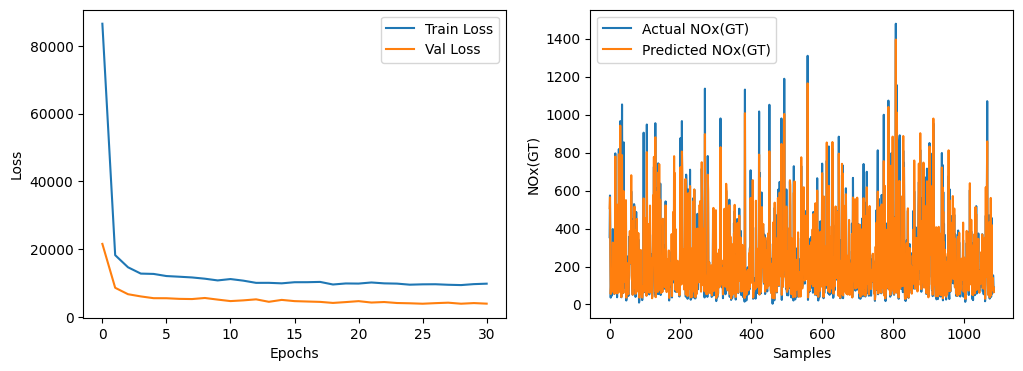

In [96]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_reg.history['loss'], label='Train Loss')
plt.plot(history_reg.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_val_reg, label='Actual NOx(GT)')
plt.plot(y_val_reg_pred, label='Predicted NOx(GT)')
plt.xlabel('Samples')
plt.ylabel('NOx(GT)')
plt.legend()
plt.show()
